In [7]:
#Parameters

e1 = 1/3
e2 = 1/3

l1 = 1/4
l2 = 1

fi = pi/2

In [9]:
z = var('z')
x,y = var('x,y',domain='complex')
xs,ys = var('x,y',domain='real')
mu = var('mu',domain='complex')

In [10]:
#Sets of equations as seen in the theory

#Zetas

zeta = x + I*y
zeta_bar = x - I*y

#I here denotes a square root of -1, bar stands for conjugates

In [11]:
z_bar(z) = zeta_bar + e1/(z-l1*exp(I*fi)) + e2/(z+l1*exp(I*fi)) + (1-e1-e2)/(z-l2)
L(z) = zeta -z + e1/(z_bar(z)-l1*exp(-I*fi)) + e2/(z_bar(z)+l1*exp(-I*fi)) + (1-e1-e2)/(z_bar(z)-l2)

exp1 = L(z).numerator(normalize=true)

In [12]:
derivative_z(z) = e1/(z_bar(z)-l1*exp(-I*fi))^2 + e2/(z_bar(z)+l1*exp(-I*fi))^2 + (1-e1-e2)/(z_bar(z)-l2)^2
derivative_z_bar(z) = e1/(z-l1*exp(I*fi))^2 + e2/(z+l1*exp(I*fi))^2 + (1-e1-e2)/(z-l2)^2

magnification(z) = mu*(1-derivative_z(z)*derivative_z_bar(z))-1

exp2 = magnification(z).numerator(normalize=true)

In [13]:
def mag(xs,ys):
    
    test = resultant(xs,ys)
    temp(mu) = test
    
    ff = fast_callable(temp,vars=[mu])
    roots = solve([ff(mu)==0],mu,to_poly_solve="true")
    mag = sum([abs(roots[t].rhs().n()) for t in range(len(roots))])
    
    return log(mag)

In [14]:
def resultant(xs,ys):
    
    temp1 = exp1.subs({x:xs,y:ys})
    temp2 = exp2.subs({x:xs,y:ys})
    
    ZZI.<I> = QQ[i]
    R.<mu> = ZZI[]
    S.<z> = R[]

    poly1 = temp1.polynomial(None,ring=S)
    poly2 = temp2.polynomial(None,ring=S)

    poly3 = poly1.resultant(poly2)
    
    return poly3
    

In [15]:
mag(33/100,13/100)

1.77500016693722

In [21]:
x_list = []
y_list = []

for u in range(21):
    x_list.append(u/20)
    
for u in range(1,21):
    x_list.append(-u/20)

In [22]:
x_list.sort()

y_list = x_list

len(y_list)

41

In [28]:
import numpy as np

A = np.zeros([41,41])

In [29]:
for u in range(41):
    for v in range(41):
        A[u,v] = mag(x_list[u],y_list[v])

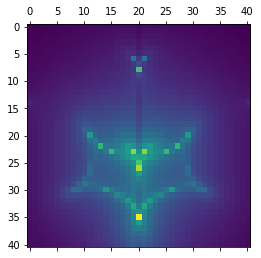

In [30]:
import matplotlib.pyplot as plt

plt.matshow(A)

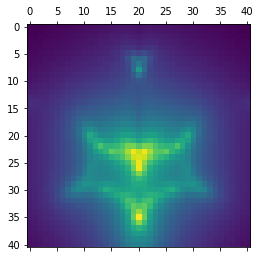

In [33]:
from scipy.ndimage import gaussian_filter

smooth_operator = gaussian_filter(A, sigma=0.7)

plt.matshow(smooth_operator)